In [20]:
from IPython.display import IFrame
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.misc

from __future__ import print_function, unicode_literals
from builtins import open

from future import standard_library
standard_library.install_aliases()
import nibabel 

import nibabel as nib

import os
import urllib.request
import urllib.error
import urllib.parse
from nipype.interfaces.ants import Registration
import os
import sys 
sys.path.insert(0, '../../../antsbin')

import os
import numpy as np
from nibabel.testing import data_path

# Algorithm

## Description 

ANTs computes high-dimensional mappings to capture the statistics of brain structure and function (or at least that's what their website say)

**Inputs** 
1. fixed image
2. moving image
3. similarity metric 
4. metric weights 
5. transformation (e.g. SyN, affine, rigid, translation) 
6. shrink factors 
7. smoothing sigmas 

**Outputs** 
1. The transformed image

**Pseudocode** 

In [15]:
IFrame("ANTS_nonlinear_pseudocode.pdf", width=600, height=600)

## Actual Code

In [ ]:
reg = Registration()
reg.inputs.fixed_image = input_images[0]
reg.inputs.moving_image = input_images[1]
reg.inputs.metric = ['Mattes'] * 3 + [['Mattes', 'CC']]
reg.inputs.metric_weight = [1] * 3 + [[0.5, 0.5]]
reg.inputs.shrink_factors = [[6, 4, 2]] + [[3, 2, 1]] * 2 + [[4, 2, 1]]
reg.inputs.smoothing_sigmas = [[4, 2, 1]] * 3 + [[1, 0.5, 0]]
reg.inputs.transforms = ['Translation', 'Rigid', 'Affine', 'SyN']

## Predicted Conditions 
ANTs will work well when the key features of an object to not change (i.e. a donut doesn't become a line). 

## Predictable Data Sets

**The Good Data Set:**

**Description:** The good data set is 2 100x100 volumes containing 3 clusters with value of 1. Every other value in the volume is 0. 

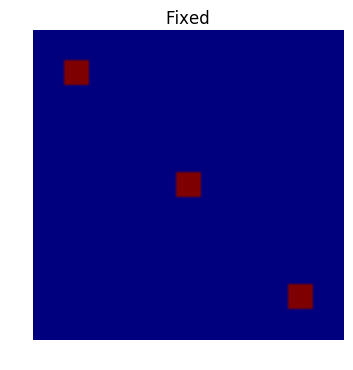

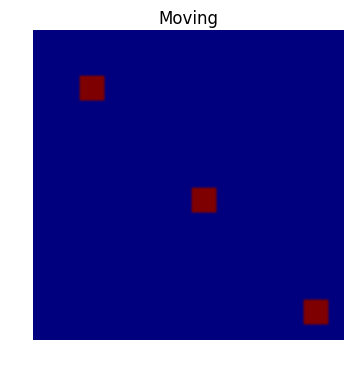

In [2]:
simEasyFixed = np.zeros((100, 100))
for i in range(4):
    for j in range(4):
        simEasyFixed[18*(2*j) + 10: 18*(2*j + 1), 18*(2*j) + 10: 18*(2*j + 1)] = 1

simEasyMoving = np.zeros((100, 100))
for i in range(4):
    for j in range(4):
        simEasyMoving[18*(2*j) + 15: 18*(2*j + 1) + 5, 18*(2*j) + 15: 18*(2*j + 1) + 5] = 1
        
plt.imshow(simEasyFixed)
plt.axis('off')
plt.title('Fixed')
plt.show()

plt.imshow(simEasyMoving)
plt.axis('off')
plt.title('Moving')
plt.show()

**The Bad Data Set:**

**Description:** The bad data set is 2 100x100 volumes, one containing 2 clusters, one containing 3 with value of 1. Every other value in the volume is 0. 

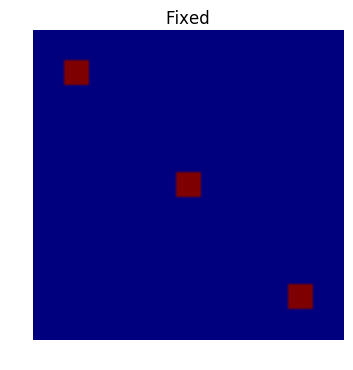

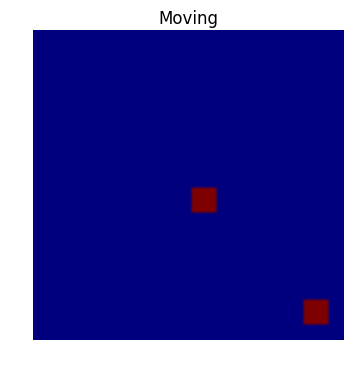

In [3]:
simBadFixed = np.zeros((100, 100))
for i in range(4):
    for j in range(4):
        simBadFixed[18*(2*j) + 10: 18*(2*j + 1), 18*(2*j) + 10: 18*(2*j + 1)] = 1

simBadMoving = np.zeros((100, 100))
for i in range(1, 4):
    for j in range(1, 4):
        simBadMoving[18*(2*j) + 15: 18*(2*j + 1) + 5, 18*(2*j) + 15: 18*(2*j + 1) + 5] = 1
        
plt.imshow(simBadFixed)
plt.axis('off')
plt.title('Fixed')
plt.show()

plt.imshow(simBadMoving)
plt.axis('off')
plt.title('Moving')
plt.show()

### Toy Data Analysis
**Good Data Prediction: ** 
I predict that the good data will be perfectly aligned. 

In [41]:
scipy.misc.imsave('simEasyFixed.jpg', simEasyFixed)
scipy.misc.imsave('simEasyMoving.jpg', simEasyMoving)

In [17]:
reg = Registration()
reg.inputs.fixed_image = 'simEasyFixed.jpg'
reg.inputs.moving_image = 'simEasyMoving.jpg'
reg.inputs.output_transform_prefix = 'thisTransform'
reg.inputs.output_warped_image = 'INTERNAL_WARPED.nii.gz'
reg.inputs.output_transform_prefix = "output_"
reg.inputs.transforms = ['Translation', 'Rigid', 'Affine', 'SyN']
reg.inputs.transform_parameters = [(0.1,), (0.1,), (0.1,), (0.2, 3.0, 0.0)]
reg.inputs.number_of_iterations = ([[10000, 111110, 11110]] * 3 + [[100, 50, 30]])
reg.inputs.dimension = 3
reg.inputs.write_composite_transform = True
reg.inputs.collapse_output_transforms = False
reg.inputs.metric = ['Mattes'] * 3 + [['Mattes', 'CC']]
reg.inputs.metric_weight = [1] * 3 + [[0.5, 0.5]]
reg.inputs.radius_or_number_of_bins = [32] * 3 + [[32, 4]]
reg.inputs.sampling_strategy = ['Regular'] * 3 + [[None, None]]
reg.inputs.sampling_percentage = [0.3] * 3 + [[None, None]]
reg.inputs.convergence_threshold = [1.e-8] * 3 + [-0.01]
reg.inputs.convergence_window_size = [20] * 3 + [5]
reg.inputs.smoothing_sigmas = [[4, 2, 1]] * 3 + [[1, 0.5, 0]]
reg.inputs.sigma_units = ['vox'] * 4
reg.inputs.shrink_factors = [[6, 4, 2]] + [[3, 2, 1]] * 2 + [[4, 2, 1]]
reg.inputs.use_estimate_learning_rate_once = [True] * 4
reg.inputs.use_histogram_matching = [False] * 3 + [True]
reg.inputs.initial_moving_transform_com = True

In [18]:
print(reg.cmdline)
reg.run()

antsRegistration --collapse-output-transforms 0 --dimensionality 3 --initial-moving-transform [ simEasyFixed.jpg, simEasyMoving.jpg, 1 ] --initialize-transforms-per-stage 0 --interpolation Linear --output [ output_, INTERNAL_WARPED.nii.gz ] --transform Translation[ 0.1 ] --metric Mattes[ simEasyFixed.jpg, simEasyMoving.jpg, 1, 32, Regular, 0.3 ] --convergence [ 10000x111110x11110, 1e-08, 20 ] --smoothing-sigmas 4.0x2.0x1.0vox --shrink-factors 6x4x2 --use-estimate-learning-rate-once 1 --use-histogram-matching 0 --transform Rigid[ 0.1 ] --metric Mattes[ simEasyFixed.jpg, simEasyMoving.jpg, 1, 32, Regular, 0.3 ] --convergence [ 10000x111110x11110, 1e-08, 20 ] --smoothing-sigmas 4.0x2.0x1.0vox --shrink-factors 3x2x1 --use-estimate-learning-rate-once 1 --use-histogram-matching 0 --transform Affine[ 0.1 ] --metric Mattes[ simEasyFixed.jpg, simEasyMoving.jpg, 1, 32, Regular, 0.3 ] --convergence [ 10000x111110x11110, 1e-08, 20 ] --smoothing-sigmas 4.0x2.0x1.0vox --shrink-factors 3x2x1 --use-es

In [38]:
example_filename = os.path.join(data_path, 'example4d.nii.gz')
img = nib.load(example_filename)
img_data = img.get_data()

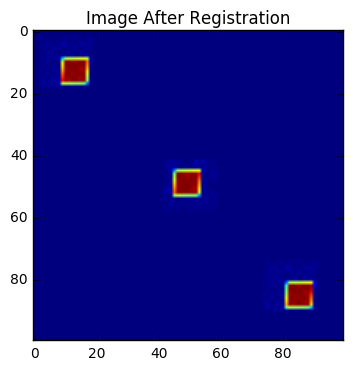

In [37]:
plt.imshow(img_data[:,:,0])
plt.title('Image After Registration')
plt.show()

In [36]:
scipy.misc.imsave('simBadFixed.jpg', simBadFixed)
scipy.misc.imsave('simBadMoving.jpg', simBadMoving)